In [77]:
import pandas as pd
import numpy as np
import pylab as pl

import os
#import geopandas

os.getcwd()

import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
import pylab as pl

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [112]:
df = pd.read_csv('meteorite-landings.csv')

In [113]:
df.head(15)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.100000, 71.800000)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949.0,44.83333,95.16667,"(44.833330, 95.166670)"
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"(44.216670, 0.616670)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.600000, -65.233330)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920.0,-30.86667,-64.55000,"(-30.866670, -64.550000)"


In [10]:
df.shape

(45716, 10)

In [12]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

In [14]:
df.dtypes

name            object
id               int64
nametype        object
recclass        object
mass           float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

In [127]:
filename = "meteorite-landings.csv"
df_missing = pd.read_csv(filename)
df_missing.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [128]:
#shows rows with missing values in the 'mass' column
missing_mass = df_missing['mass'].isnull()
#missing will only show True/False values where items above are missing entries
#it's just a confirmation of the rows I'll remove, which are all the rows missing data
#that means 7315 + 288 + 131 = max possibly, turns out 7060, so some overlap
missing_mass.loc[missing_mass].head(10)

12     True
38     True
76     True
93     True
172    True
204    True
262    True
308    True
312    True
320    True
Name: mass, dtype: bool

In [129]:
df_no_missing = df_missing.dropna()
df_clean = df_no_missing.isnull().sum()
df_clean

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

In [130]:
#save my df_no_missing (df_clean doesn't work) to a new csv on the hard drive
#import csv 

#df_no_missing.reset_index() #resetting index 
df_no_missing.to_csv(r'tb_ds_meteorite-landings.csv')



In [131]:
#I'm resetting my 'id' columns because my axis labeling doesn't reflect the 
#correct number of rows
dfn_reset_id =df_no_missing
dfn_reset_id['id'] = np.arange(len(dfn_reset_id))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [132]:
df_no_missing.head(15)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,0,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,1,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,2,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,3,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,4,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
5,Adhi Kot,5,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.100000, 71.800000)"
6,Adzhi-Bogdo (stone),6,Valid,LL3-6,910.0,Fell,1949.0,44.83333,95.16667,"(44.833330, 95.166670)"
7,Agen,7,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"(44.216670, 0.616670)"
8,Aguada,8,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.600000, -65.233330)"
9,Aguila Blanca,9,Valid,L,1440.0,Fell,1920.0,-30.86667,-64.55000,"(-30.866670, -64.550000)"


In [119]:
dfn_reset_id.tail()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
45711,Zillah 002,38111,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,38112,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,38113,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,38114,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"
45715,Zulu Queen,38115,Valid,L3.7,200.0,Found,1976.0,33.98333,-115.68333,"(33.983330, -115.683330)"


In [110]:
df_no_missing.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

In [133]:
df_no_missing.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,0,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,1,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,2,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,3,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,4,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [134]:
df_no_missing.to_csv(r'tb_ds_meteorite-landings_new_id.csv')


In [ ]:
#going to convert 'fell' and 'found' to '0' and '1', respectively and then
#gen a table comparing the numbers


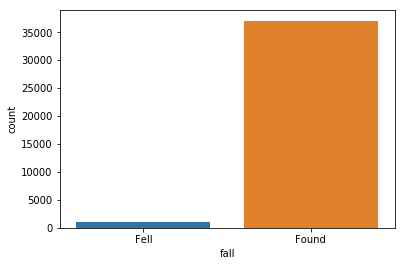

In [39]:
#barplot the fell vs found column
#sns.countplot(x='survived', data=df)
sns.countplot(x='fall', data=df_no_missing)

Text(0.5,0.98,'Asteroid Masses and Year')

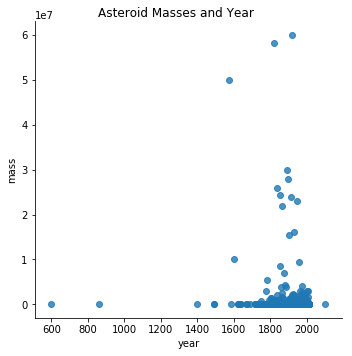

In [80]:
lm = sns.lmplot(x='year', y='mass', data=df_no_missing, fit_reg = False)

# Access the figure
fig = lm.fig

# Add a title to the Figure
fig.suptitle("Asteroid Masses and Year", fontsize = 12)

Text(0.5,0.98,'Asteroid Masses')

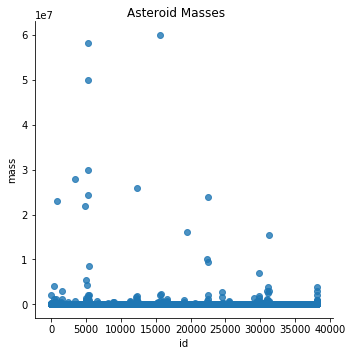

In [95]:
#make a scatterplot
#lm = sns.lmplot(x='mass', y='id', data=df_no_missing, fit_reg = False)
lm = sns.lmplot(x='id', y='mass', data=df_no_missing, fit_reg = False)

# Access the figure
fig = lm.fig

# Add a title to the Figure
fig.suptitle("Asteroid Masses", fontsize = 12)

'\n\n\n#violin plot with Pokemon color palette\nplt.subplots(figsize=(13,7))\nsns.violinplot(x=\'Type 1\', y=\'Attack\', data=df, palette=pkmn_type_colors)\n#Access the figure\nfig = vp.fig\n\n# Add a title to the Figure\nfig.suptitle("Year Occurred and Its Mass", fontsize =12)'

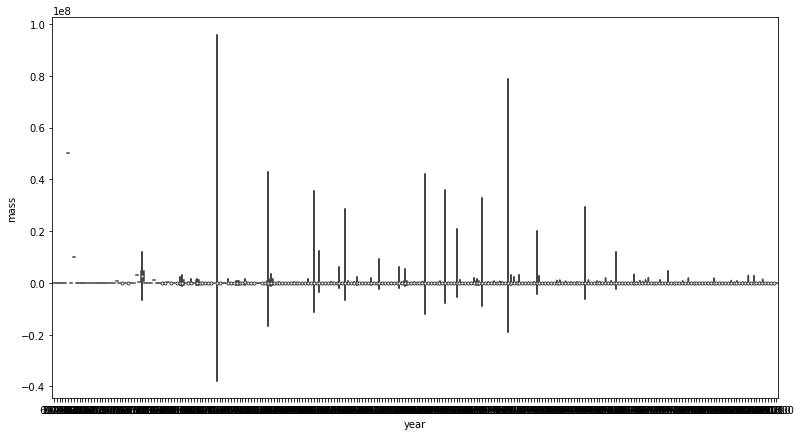

In [71]:
#trying to generate a normal distribution
#from above import statements: numpy, matplotlib.pyplot, scipy.stats as stats
#pylab as pl
"""
#sns.distplot(df_no_missing['mass'],bins=20 kde=False, rug=True)
sns.distplot(df_no_missing['mass'])


dfToList = df_no_missing['mass'].tolist() #df to list of mass values
dtl = dfToList.sort()
dtl_mean = np.mean(dtl)
dtl_dev = np.std(dtl)
pdf = stats.norm.pdf(dtl,dtl_mean, dtl_dev)
plt.plot(dtl, pdf) #includeing dtl here is crucial


std = np.std(df_no_missing.std('mass'))
mean = np.mean(df_no_missing.mean('mass'))
plt.plot(norm.pdf('mass',mean, std))


"""
#violin plot with Pokemon color palette
plt.subplots(figsize=(13,7))
vp = sns.violinplot(x='year', y='mass', data=df_no_missing)
"""


#violin plot with Pokemon color palette
plt.subplots(figsize=(13,7))
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)
#Access the figure
fig = vp.fig

# Add a title to the Figure
fig.suptitle("Year Occurred and Its Mass", fontsize =12)"""

In [84]:
df_no_missing.sort_values('year')

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
38301,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601.0,49.41667,21.70000,"(49.416670, 21.700000)"
703,Nogata,16988,Valid,L6,472.0,Fell,860.0,33.72500,130.75000,"(33.725000, 130.750000)"
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399.0,50.18333,12.73333,"(50.183330, 12.733330)"
852,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490.0,45.48333,9.51667,"(45.483330, 9.516670)"
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491.0,47.86667,7.35000,"(47.866670, 7.350000)"
5329,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575.0,-27.46667,-60.58333,"(-27.466670, -60.583330)"
174,Castrovillari,5295,Valid,Stone-uncl,15000.0,Fell,1583.0,39.80000,16.20000,"(39.800000, 16.200000)"
26166,Morito,16745,Valid,"Iron, IIIAB",10100000.0,Found,1600.0,27.05000,-105.43333,"(27.050000, -105.433330)"
410,Jalandhar,12069,Valid,Iron,1967.0,Fell,1621.0,31.00000,75.00000,"(31.000000, 75.000000)"
956,Stretchleigh,23732,Valid,Stone-uncl,10400.0,Fell,1623.0,50.38333,-3.95000,"(50.383330, -3.950000)"
